In [1]:
import matplotlib.dates as mdates
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
import pandas as pd
from tqdm.notebook import tqdm
import my_funcs as my
import matplotlib.colors as colors
from matplotlib.dates import date2num
from matplotlib.animation import FuncAnimation
import time
import sys
sys.path.append('/Volumes/GoogleDrive/My Drive/Projects/code-repos/mdp_functions/')
import plot_params

In [1]:
import xarray as xr

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [7]:
ds = xr.open_dataset('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/data/modis-satellite-CTT/MYD06_L2.A2018353.1240.061.2018354154030.hdf', engine='netcdf4')

In [12]:
flist = glob('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/data/modis-satellite-CTT/*.hdf')

In [18]:
del(ds)
ds = xr.open_dataset(flist[31], engine='netcdf4')

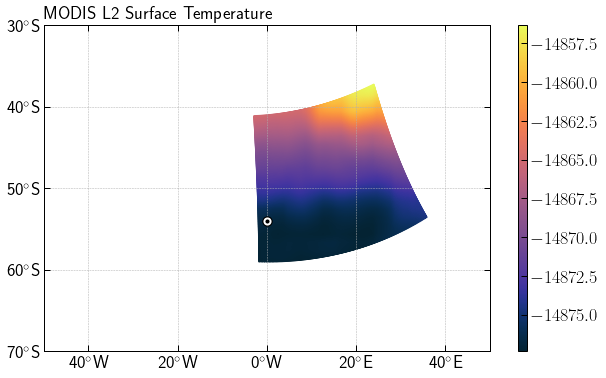

In [19]:
fig,ax=plt.subplots(figsize=(10,6))

# img = ax.scatter(ds['lon'], ds['lat'], s=1, c=ds['Cloud_Top_Pressure'], 
#                  vmin=300, vmax=1000, cmap=cmo.deep)

img = ax.scatter(ds['Longitude'], ds['Latitude'], s=1, c=ds['Surface_Temperature'], 
                 cmap=cmo.thermal)

ax.set_ylim(-70, -30)
ax.set_xlim(-50, 50)

ax.set_title('MODIS L2 Surface Temperature', loc='left', fontsize=18)
# ax.set_title(day, loc='right', fontsize=18)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.grid(lw=0.5, ls='--')

ax.scatter(0, -54, s=350, marker='.', c='k', zorder=10)
ax.scatter(0, -54, s=150, marker='.', c='k', edgecolor='w', lw=2, zorder=20)

ax.xaxis.set_ticks(np.arange(-40, 60, 20))
ax.xaxis.set_ticklabels(['40$^{\circ}$W', '20$^{\circ}$W', '0$^{\circ}$W', '20$^{\circ}$E', '40$^{\circ}$E'])
ax.yaxis.set_ticks(np.arange(-70, -20, 10))
ax.yaxis.set_ticklabels(['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'])

plt.colorbar(img, aspect=35)

In [9]:
ds

<xarray.Dataset>
Dimensions:                                   (Cell_Along_Swath_5km:mod06: 406,
                                               Cell_Across_Swath_5km:mod06: 270,
                                               Band_Number:mod06: 7,
                                               Band_Forcing:mod06: 5,
                                               Band_Ratio:mod06: 5,
                                               Cell_Along_Swath_1km:mod06: 2030,
                                               ...
                                               RadTran_NRE_Liq:mod06: 18,
                                               SPI_nband:mod06: 2,
                                               RFM_nband:mod06: 3,
                                               ACR_nband:mod06: 6,
                                               QA_Parameter_1km:mod06: 9,
                                               fakeDim17: 17)
Dimensions without coordinates: Cell_Along_Swath_5km:mod06,
                                Cell_Across_Swath_5km:mod06, Band_Number:mod06,
                                Band_Forcing:mod06, Band_Ratio:mod06,
                                Cell_Along_Swath_1km:mod06,
                                Cell_Across_Swath_1km:mod06,
                                Cloud_Mask_5km_Num_Bytes:mod06,
                                QA_Parameter_5km:mod06,
                                Cloud_Mask_1km_Num_Bytes:mod06,
                                RadTran_NRE_Ice:mod06, RadTran_NWL:mod06,
                                RadTran_NRE_Liq:mod06, SPI_nband:mod06,
                                RFM_nband:mod06, ACR_nband:mod06,
                                QA_Parameter_1km:mod06, fakeDim17
Data variables: (12/127)
    Latitude                                  (Cell_Along_Swath_5km:mod06, Cell_Across_Swath_5km:mod06) float32 ...
    Longitude                                 (Cell_Along_Swath_5km:mod06, Cell_Across_Swath_5km:mod06) float32 ...
    Scan_Start_Time                           (Cell_Along_Swath_5km:mod06, Cell_Across_Swath_5km:mod06) datetime64[ns] ...
    Solar_Zenith                              (Cell_Along_Swath_5km:mod06, Cell_Across_Swath_5km:mod06) float32 ...
    Solar_Zenith_Day                          (Cell_Along_Swath_5km:mod06, Cell_Across_Swath_5km:mod06) float32 ...
    Solar_Zenith_Night                        (Cell_Along_Swath_5km:mod06, Cell_Across_Swath_5km:mod06) float32 ...
    ...                                        ...
    Retrieval_Failure_Metric_16               (Cell_Along_Swath_1km:mod06, Cell_Across_Swath_1km:mod06, RFM_nband:mod06) float32 ...
    Retrieval_Failure_Metric_37               (Cell_Along_Swath_1km:mod06, Cell_Across_Swath_1km:mod06, RFM_nband:mod06) float32 ...
    Retrieval_Failure_Metric_1621             (Cell_Along_Swath_1km:mod06, Cell_Across_Swath_1km:mod06, RFM_nband:mod06) float32 ...
    Atm_Corr_Refl                             (Cell_Along_Swath_1km:mod06, Cell_Across_Swath_1km:mod06, ACR_nband:mod06) float32 ...
    Quality_Assurance_1km                     (Cell_Along_Swath_1km:mod06, Cell_Across_Swath_1km:mod06, QA_Parameter_1km:mod06) float32 ...
    Statistics_1km_sds                        (fakeDim17) float32 ...
Attributes: (12/14)
    HDFEOSVersion:                     HDFEOS_V2.19
    StructMetadata.0:                  GROUP=SwathStructure\n\tGROUP=SWATH_1\...
    Number_of_Instrument_Scans:        2030
    Maximum_Number_of_1km_Frames:      1354
    history:                           $Id: MOD06_L2.CDL.fs,v 1.13 2013/06/19...
    title:                             MODIS Level 2 Cloud Properties        ...
    ...                                ...
    Clear_Sky_Restoral_Status:         y
    Collection_4_Phase_Used:           n
    Ice_Phase_Forced:                  n
    Water_Phase_Forced:                n
    identifier_product_doi:            10.5067/MODIS/MYD06_L2.061
    identifier_product_doi_authority:  http://dx.doi.org

In [3]:
from glob import glob

flist = glob('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/data/modis-satellite-CTT/*.hdf')

### Processing the individual swath data to make daily composites 

First we set up an array of the year days that we are analysing

In [4]:
days=np.append(np.arange(353,366,1), np.arange(1, 68, 1))
new_days=[]

for d in days:
    
    if d<10:        
        new_days+='00'+str(d),
        
    elif ((d>9) & (d<100)):        
        new_days+='0'+str(d),
        
    else:
        new_days+=str(d),

Now we do the heavy compuatation of reading in all files for one day, concatenating them to make daily files and saving each file to netCDF

In [ ]:
for d in tqdm(new_days):
    
    new_flist=[]
    
    for f in flist:
        
        if f[118:121]==d:
            
            new_flist+=f,
            
    for i, file in enumerate(new_flist):
        
        t = time.time()
        ds=xr.open_dataset(file, engine='netcdf4')
        elapsed = time.time() - t
        
        print(str(elapsed)+' seconds')

        lon = ds['Longitude'].values.flatten()
        lat = ds['Latitude'].values.flatten()
        ctp = ds['Cloud_Top_Pressure'].values.flatten()
        ctt = ds['Cloud_Top_Temperature'].values.flatten()
        tim = ds['Scan_Start_Time'].values.flatten()
        
        da = xr.Dataset(data_vars =
                        {'Cloud_Top_Temperature': (['time'], ctt),
                         'Cloud_Top_Pressure'   : (['time'], ctp),
                        },
                        
                        coords =
                        {'time': tim,
                         'lon' : (['time'], lon),
                         'lat' : (['time'], lat)
                        },
                       )
                
        if i==0:            
            new_ds=da
        
        if i>0:
            new_ds = xr.concat([new_ds, da], dim='time')
        
        ds.close()
        da.close()
        del(ds)
        del(da)
            
    new_ds.to_netcdf('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/data/modis-satellie-daily/modis_ctt_ctp_'+d+'.nc')
    
    del(new_ds)
                

### Read in one daily file to do some basic plotting

In [4]:
ds = xr.open_dataset('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/data/modis-satellite-daily/modis_ctt_ctp_004.nc')

Having issues with Cloud Top Temperature values. It's so not right...

In [ ]:
data = ((ds['Cloud_Top_Temperature'] - 15000.0) * 0.009999999776482582) + 273.15

Plot up an individual day so we can see what the plot will look like

In [6]:
ds

<xarray.Dataset>
Dimensions:                (time: 1097280)
Coordinates:
  * time                   (time) datetime64[ns] 2019-01-04T12:40:10.782970 ....
    lon                    (time) float32 ...
    lat                    (time) float32 ...
Data variables:
    Cloud_Top_Temperature  (time) float32 ...
    Cloud_Top_Pressure     (time) float32 ...

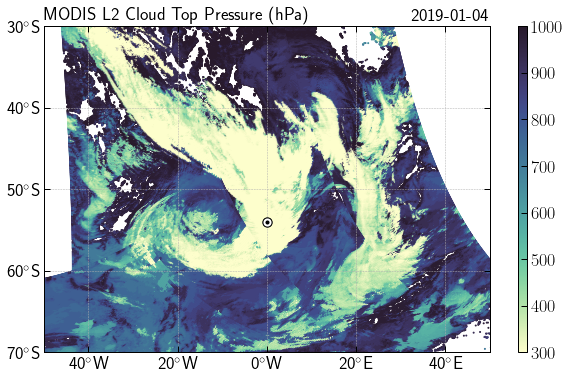

In [98]:
day=str(ds.time[0].values)[:10]

fig,ax=plt.subplots(figsize=(10,6))

# img = ax.scatter(ds['lon'], ds['lat'], s=1, c=ds['Cloud_Top_Pressure'], 
#                  vmin=300, vmax=1000, cmap=cmo.deep)

img = ax.scatter(ds['lon'], ds['lat'], s=1, c=ds['Sur'], 
                 vmin=300, vmax=1000, cmap=cmo.deep)

ax.set_ylim(-70, -30)
ax.set_xlim(-50, 50)

ax.set_title('MODIS L2 Cloud Top Pressure (hPa)', loc='left', fontsize=18)
ax.set_title(day, loc='right', fontsize=18)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.grid(lw=0.5, ls='--')

ax.scatter(0, -54, s=350, marker='.', c='k', zorder=10)
ax.scatter(0, -54, s=150, marker='.', c='k', edgecolor='w', lw=2, zorder=20)

ax.xaxis.set_ticks(np.arange(-40, 60, 20))
ax.xaxis.set_ticklabels(['40$^{\circ}$W', '20$^{\circ}$W', '0$^{\circ}$W', '20$^{\circ}$E', '40$^{\circ}$E'])
ax.yaxis.set_ticks(np.arange(-70, -20, 10))
ax.yaxis.set_ticklabels(['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'])

plt.colorbar(img, aspect=35)

### Looping through all the daily files and making maps of cloud properties

Cloud Top Temperature

In [ ]:
for d in tqdm(new_days):
    
    t = time.time()
    ds = xr.open_dataset('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/data/modis-satellite-daily/modis_ctt_ctp_'+d+'.nc')
    elapsed = time.time() - t
    
    print(elapsed)
        
    data = ((ds['Cloud_Top_Temperature'] - 15000.0) * 0.009999999776482582) + 273.15
    
    day=str(ds.time[0].values)[:10]
    
    fig,ax=plt.subplots(figsize=(10,6))
    
    img = ax.scatter(ds['lon'], ds['lat'], s=0.1, c=data, cmap=cmo.thermal, vmin=-25.4, vmax=-26.2)
    
    ax.set_ylim(-70, -30)
    ax.set_xlim(-50, 50)
    
    ax.set_title('MODIS L2 Cloud Top Temperature ($^{\circ}$C)', loc='left', fontsize=18)
    ax.set_title(day, loc='right', fontsize=18)
    
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    
    ax.grid(lw=0.5, ls='--')
    
    ax.scatter(0, -54, s=350, marker='.', c='k', zorder=10)
    ax.scatter(0, -54, s=150, marker='.', c='k', edgecolor='w', lw=2, zorder=20)
    
    ax.xaxis.set_ticks(np.arange(-40, 60, 20))
    ax.xaxis.set_ticklabels(['40$^{\circ}$W', '20$^{\circ}$W', '0$^{\circ}$W', '20$^{\circ}$E', '40$^{\circ}$E'])
    ax.yaxis.set_ticks(np.arange(-70, -20, 10))
    ax.yaxis.set_ticklabels(['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'])
    
    plt.colorbar(img, aspect=35)
    
    plt.savefig('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/figs/modis-ctp/'+'modis_ctt_'+d+'.png', dpi=200)
    
    del(ds)
    plt.close(fig)

Cloud Top Pressure

In [5]:
for d in tqdm(new_days):
    
    
    ds = xr.open_dataset('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/data/modis-satellite-daily/modis_ctt_ctp_'+d+'.nc')
        
    data = ds['Cloud_Top_Pressure']
    
    day=str(ds.time[0].values)[:10]
    
    fig,ax=plt.subplots(figsize=(10,6))

    t = time.time()
    img = ax.scatter(ds['lon'], ds['lat'], s=0.1, c=data, cmap=cmo.deep, vmin=200, vmax=1000)
    elapsed = time.time() - t
    
    print(elapsed)
    
    ax.set_ylim(-70, -30)
    ax.set_xlim(-50, 50)
    
    ax.set_title('MODIS L2 Cloud Top Pressure (hPa)', loc='left', fontsize=18)
    ax.set_title(day, loc='right', fontsize=18)
    
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    
    ax.grid(lw=0.5, ls='--')
    
    ax.scatter(0, -54, s=350, marker='.', c='k', zorder=10)
    ax.scatter(0, -54, s=150, marker='.', c='k', edgecolor='w', lw=2, zorder=20)
    
    ax.xaxis.set_ticks(np.arange(-40, 60, 20))
    ax.xaxis.set_ticklabels(['40$^{\circ}$W', '20$^{\circ}$W', '0$^{\circ}$W', '20$^{\circ}$E', '40$^{\circ}$E'])
    ax.yaxis.set_ticks(np.arange(-70, -20, 10))
    ax.yaxis.set_ticklabels(['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'])
    
    plt.colorbar(img, aspect=35)
    
    plt.savefig('/Users/xduplm/Google Drive/My Drive/Projects/duplessis-2022-turbulent-heatflux/figs/modis-ctp/'+'modis_ctp_'+d+'.png', dpi=200)
    
    del(ds)
    plt.close(fig)

  0%|          | 0/80 [00:00<?, ?it/s]

0.09779214859008789
0.06060004234313965
0.0478818416595459
0.03709602355957031
0.046965837478637695
0.04333209991455078
0.05305886268615723
0.042678117752075195
0.04377388954162598
0.03794288635253906
0.03975558280944824
0.05137014389038086
0.041702985763549805
0.052546024322509766
0.045571088790893555
0.04024171829223633
0.04382514953613281
0.04577493667602539
0.044129133224487305
0.041359901428222656
0.0442049503326416
0.04331493377685547
0.04335498809814453
0.04465007781982422
0.04787588119506836
0.04469919204711914
0.040065765380859375
0.04894304275512695
0.03747415542602539
0.04713702201843262
0.04595184326171875
0.039407968521118164
0.03674507141113281
0.043229103088378906
0.04183697700500488
0.03762507438659668
0.047796010971069336
0.040904998779296875
0.0456850528717041
0.043226003646850586
0.03975510597229004
0.04485583305358887
0.04134106636047363
0.0419309139251709
0.04511404037475586
0.04329085350036621
0.03949904441833496
0.04814600944519043
0.04054403305053711
0.044676065